<img src="https://github.com/seap-udea/xearch/blob/main/resources/xearch.png?raw=true" align="left">

## Required packages

In [5]:
# External modules
import spiceypy as spy
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
import pandas as pd
# Read planetary systems
exec(open('systems-full.py').read())
# Constants
deg = np.pi/180
Msun = c.M_sun.value
Mearth = c.M_earth.value
Mjup = c.M_jup.value
AU = c.au.value 
G = c.G.value
Rsun = c.R_sun.value
Rearth = c.R_earth.value
Rjup = c.R_jup.value
days = 86400
years = 365.25*days

## Generate radial velocity (single planet)

In [49]:
def generate_radial_velocity_single(
        name,
        planet=0,
        tcad=0.1, # in planet periods
        nperiods=3.2, 
        deltav=5, # in m/s
        seed=1
    ):

    # System
    global systems
    system = systems[name]

    # Check that system is detected by radial velocity
    planet = system['planets'][planet]
    if planet['method'] != 'Radial Velocity':
        raise ValueError(f"{name} {planet['name']} is not detected by radial velocity")

    # Units 
    units = system['units'].split(', ')
    UL = eval(units[4])
    UM = eval(units[0])
    UMP = eval(units[2])
    URP = eval(units[3])
    UPP = eval(units[5])
    UT = np.sqrt(UL**3/(G*UM))
    UV = UL/UT

    # System parameters
    m1 = system['star']['mass']
    m2 = planet['mass']*UMP/UM
    mu = m1 + m2
    a = planet['a']*UL/AU
    e = planet['e']
    I = planet['I']*deg
    T = planet['period']*UPP/UT

    # Additional parameters
    q = a*(1 - e)
    W = 90*deg
    w = 0*deg
    M = -120*deg

    tobs = np.arange(0,nperiods*T,tcad*T)
    Nt = len(tobs)
    Xs = np.zeros((Nt,6))
    X1s = np.zeros((Nt,6))
    for i,t in enumerate(tobs):
        Xs[i] = spy.conics([q, e, I, W, w, M, 0, mu], t)
        X1s[i] = m2/mu*Xs[i]
        
    # Compute observed radial velocity
    vrads = X1s[:,3]
    dvrads = (deltav/UV)*np.ones_like(vrads)
    np.random.seed(seed)
    vrads = np.random.normal(vrads,dvrads)

    df = pd.DataFrame(dict(tobs=tobs*UT,vrads=vrads*UV,dvrads=dvrads*UV))

    # Store information
    df['stellar_mass'] = m1
    df['planet_mass'] = m2
    df['UM'] = UM
    df['UL'] = UL
    df['UT'] = UT

    return system,units,df

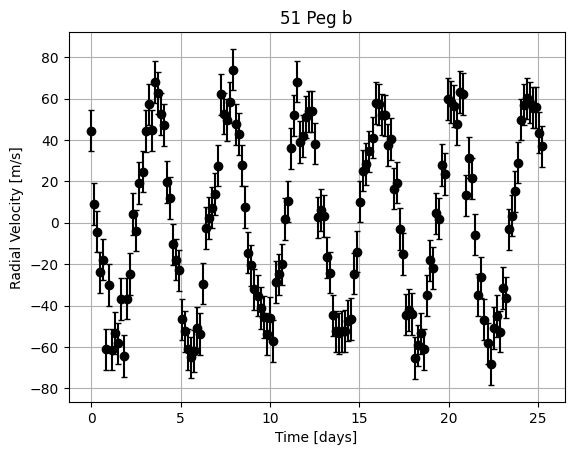

In [50]:
system,units,df = generate_radial_velocity_single('51 Peg',tcad=0.04,nperiods=6,deltav=10)

df.stellar_mass = system['star']['mass']

fig,axs = plt.subplots(1,1)
ax = axs
ax.errorbar(df.tobs/days,df.vrads,df.dvrads,color='k',fmt='o',capsize=2)
ax.set_xlabel(f"Time [{units[5]}]")
ax.set_ylabel(f"Radial Velocity [m/s]")
ax.grid()
ax.set_title(f"{system['name']} {system['planets'][0]['name']}")
df.to_csv(f"signals/{system['name'].replace(' ','_')}_{system['planets'][0]['name']}.csv",index=False)

In [48]:
df

,tobs,vrads,dvrads,stellar_mass,UM,UL,UT
0,0.00,44.575743,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
1,14618.88,9.042053,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
2,29237.76,-4.258196,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
3,43856.64,-23.907307,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
4,58475.52,-17.887223,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
...,...,...,...,...,...,...,...
145,2119737.60,58.041580,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
146,2134356.48,55.651108,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
147,2148975.36,55.777749,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06
148,2163594.24,43.488149,10.0,1.06,1.988410e+30,1.495979e+11,5.022643e+06


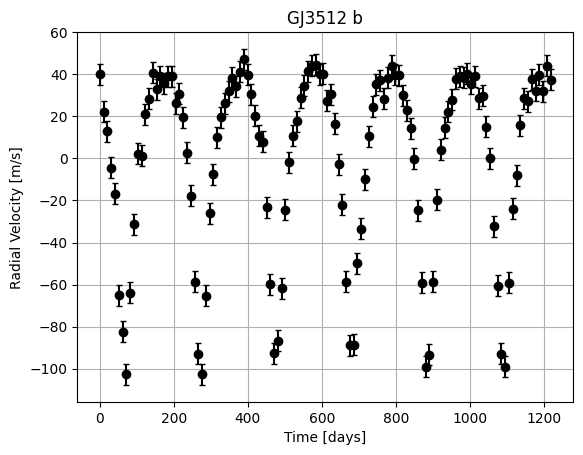

In [51]:
exec(open('systems-full.py').read())
system,units,df = generate_radial_velocity_single('GJ3512',tcad=0.05,nperiods=6,deltav=5)

fig,axs = plt.subplots(1,1)
ax = axs
ax.errorbar(df.tobs/days,df.vrads,df.dvrads,color='k',fmt='o',capsize=2)
ax.set_xlabel(f"Time [{units[5]}]")
ax.set_ylabel(f"Radial Velocity [m/s]")
ax.grid()
ax.set_title(f"{system['name']} {system['planets'][0]['name']}")
df.to_csv(f"signals/{system['name'].replace(' ','_')}_{system['planets'][0]['name']}.csv",index=False)

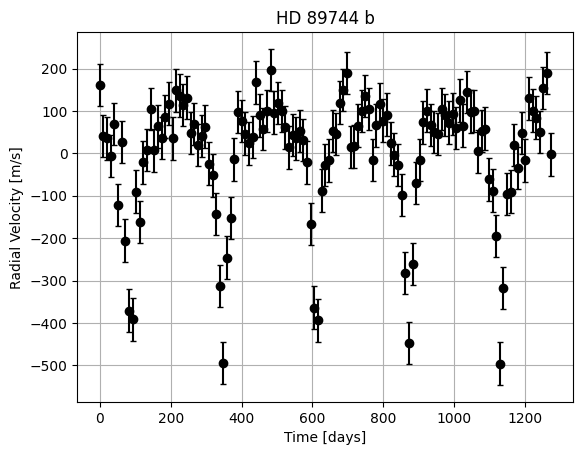

In [52]:
exec(open('systems-full.py').read())
system,units,df = generate_radial_velocity_single('HD 89744',tcad=0.04,nperiods=5,deltav=50)

fig,axs = plt.subplots(1,1)
ax = axs
ax.errorbar(df.tobs/days,df.vrads,df.dvrads,color='k',fmt='o',capsize=2)
ax.set_xlabel(f"Time [{units[5]}]")
ax.set_ylabel(f"Radial Velocity [m/s]")
ax.grid()
ax.set_title(f"{system['name']} {system['planets'][0]['name']}")
df.to_csv(f"signals/{system['name'].replace(' ','_')}_{system['planets'][0]['name']}.csv",index=False)

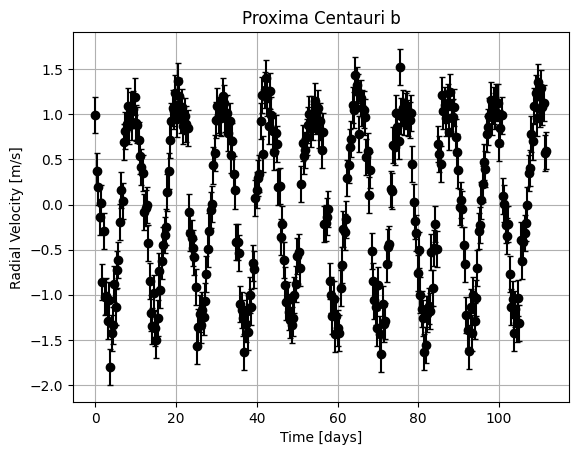

In [53]:
exec(open('systems-full.py').read())
system,units,df = generate_radial_velocity_single('Proxima Centauri',tcad=0.03,nperiods=10,deltav=0.2)

fig,axs = plt.subplots(1,1)
ax = axs
ax.errorbar(df.tobs/days,df.vrads,df.dvrads,color='k',fmt='o',capsize=2)
ax.set_xlabel(f"Time [{units[5]}]")
ax.set_ylabel(f"Radial Velocity [m/s]")
ax.grid()
ax.set_title(f"{system['name']} {system['planets'][0]['name']}")
df.to_csv(f"signals/{system['name'].replace(' ','_')}_{system['planets'][0]['name']}.csv",index=False)